In [1]:
import math
import numpy as np
from torch import nn
from torch.nn import init
from torch.nn.modules import loss
import torch

In [2]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline  

## Восставновление матрицы малого ранга (2 балла)

Есть неизвестная матрица X_taget. (В тетрадке она хранятся явно, для самопроверки)
X_noised - зашумленная матрица, по которой нужно восстановить X_taget.

Для решения задачи. Нужно задать две матрицы $H$, $W$ и найти минимум $|| W * H = X_{noisy} ||$ методом градиентного спуска.

Напишите градиетный спуск и подберите learning rate и количетсво итераций. 

In [3]:
def get_X():
    np.random.seed(12345)
    W_ = np.random.randn(73, 6)
    H_ = np.random.randn(6, 46)
    X_taget = W_.dot(H_)
    return torch.tensor(X_taget), torch.tensor(X_taget + np.random.randn(73, 46) * 0.1)

In [4]:
X_taget, X_noisy = get_X()

In [5]:
def dist(X1, X2):
    d = (X1 - X2) ** 2
    return d.mean()

In [ ]:
# Минимизируейте dist(X_taget, W.matmul(H))

In [6]:
W = ...
H = ...

In [ ]:
...

In [ ]:
base_dist = dist(X_noisy, X_taget).item()
recoverd_dist = dist(W.matmul(H), X_taget).item()

In [ ]:
# Восстановленая матрица должна быть ближе к исходной чем шумная
print(f"Distance to noisy matrix:     {base_dist}")
print(f"Distance to recovered matrix: {recoverd_dist}")

In [ ]:
assert recoverd_dist < base_dist

## Эластичная веревка (4 балла)

Эластичная веревка свободно провисает между двумя опорами. Нужно смоделировать какую форму примет веревка.

Представим веревку как набор одинаковых грузов, соединенных невесомыми пружинами. Нам требуется найти такое положение грузов, в котором суммарная потенциальная энергия будет минимальна.

Потенциальная энергия груза зависит от высоты:

$$ E^m_i = mgh_i = mgy_i $$

Потенциальная энергия пружины зависит от расстояния между соседним грузами $ d_{i, i+1} $

$$ E^s_{i,i+1} = k (d_{i, i+1} - d_0) ^ 2 / 2 $$

Запишите выражение для энергии и найдите минимум методом градиентного спуска. (Не забудьте, что крайние грузы зафиксированы их положение всегда равно начальному)

Ниже заданы все необходимые константы:
* `g` - ускорение свободного падения $g$
* `x_start`, `y_start` - начальные координаты грузов
* `start_dist` - длина пружины с свобдном состоянии $d_0$
* `k` - коэффициент упругости пружины $k$
* `mass` - масса груза $m$

In [19]:
# 
joints_number = 40

g = 9.81 # м/с2

x_start = np.linspace(0, 1, num=joints_number + 1) 
y_start = np.zeros(joints_number + 1)

start_dist = 1 / joints_number # м

k = 1 * joints_number # Н/м

mass = 0.01 / (joints_number + 1) # кг

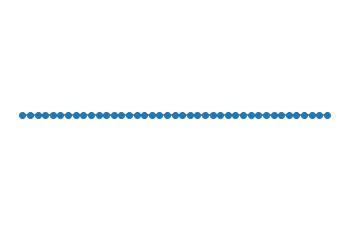

In [20]:
plt.axis("off")
plt.plot(x_start, y_start, marker='o')
plt.show()

In [21]:
x = torch.tensor(x_start, requires_grad=True, dtype=torch.float32)
y = torch.tensor(y_start, requires_grad=True, dtype=torch.float32)

In [22]:
def E_mass(x, y):
    return ...

In [23]:
def E_springs(x, y):
    return ...

In [24]:
def E(x, y):    
    return E_mass(x, y) + E_springs(x, y)

In [25]:
E(x, y)

tensor(3.7512e-13, grad_fn=<AddBackward0>)

In [ ]:
...

In [40]:
# Получите суммарную энергию меньше -0.007

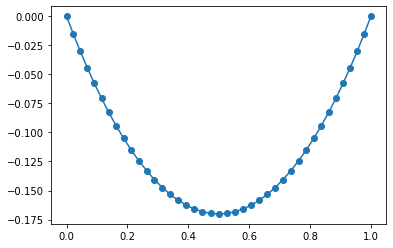

In [41]:
plt.plot(x.detach().numpy(), y.detach().numpy(), marker='o')
plt.show()